## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string ,re
import warnings ,os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
plt.figure(figsize=(16,7))
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

<Figure size 1152x504 with 0 Axes>

In [3]:
# load data
train = pd.read_csv('/home/pi/Downloads/train.tsv.zip',sep='\t')
test = pd.read_csv('/home/pi/Downloads/test.tsv.zip' ,sep='\t')

## Exploratory Data Analysis

In [4]:
train.shape,test.shape

((156060, 4), (66292, 3))

In [5]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [6]:
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [7]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [8]:
# Sentiment Description
train['sentiment_class'] = train['Sentiment'].map({0:'negative',1:'somewhat negative',2:'neutral',3:'somewhat positive',4:'positive'})
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment    sentiment_class  
0          1  somewhat negative  
1          2            neutral  
2          2            neutral  
3          2            neutral  
4          2            neutral

In [9]:
# Remove punctuation
def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])

In [10]:
train['Phrase'] = train['Phrase'].apply(lambda x : remove_punctuation(x))

In [11]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment    sentiment_class  
0          1  somewhat negative  
1          2            neutral  
2          2            neutral  
3          2            neutral  
4          2            neutral

In [12]:
# Remove words with less than 2 characters
def words_with_some_more_than_three_chars(text):
    return " ".join([t for t in text.split() if len(t)>3])

In [13]:
train['Phrase'] = train['Phrase'].apply(lambda x:words_with_some_more_than_three_chars(x))

In [14]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  series escapades demonstrating adage that what...   
1         2           1  series escapades demonstrating adage that what...   
2         3           1                                             series   
3         4           1                                                      
4         5           1                                             series   

   Sentiment    sentiment_class  
0          1  somewhat negative  
1          2            neutral  
2          2            neutral  
3          2            neutral  
4          2            neutral

In [15]:
# Remove stopwords
stop_words = stopwords.words('english')
train["Pharase"] = train['Phrase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [16]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  series escapades demonstrating adage that what...   
1         2           1  series escapades demonstrating adage that what...   
2         3           1                                             series   
3         4           1                                                      
4         5           1                                             series   

   Sentiment    sentiment_class  \
0          1  somewhat negative   
1          2            neutral   
2          2            neutral   
3          2            neutral   
4          2            neutral   

                                             Pharase  
0  series escapades demonstrating adage good goos...  
1    series escapades demonstrating adage good goose  
2                                             series  
3                                                     
4                                             series

In [17]:
train.groupby('Sentiment')['Sentiment'].count()

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: Sentiment, dtype: int64

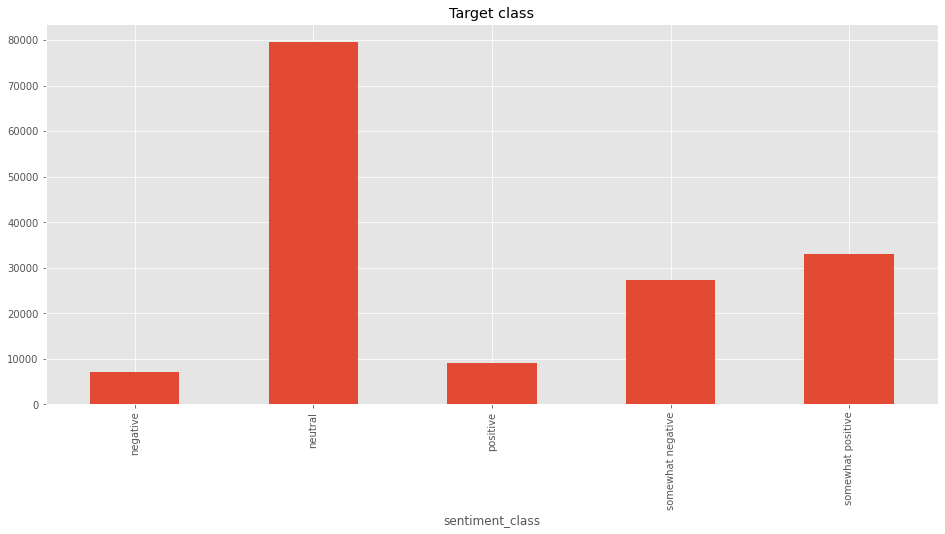

In [18]:
train.groupby('sentiment_class')['sentiment_class'].count().plot(kind='bar',title='Target class',figsize=(16,7),grid=True)


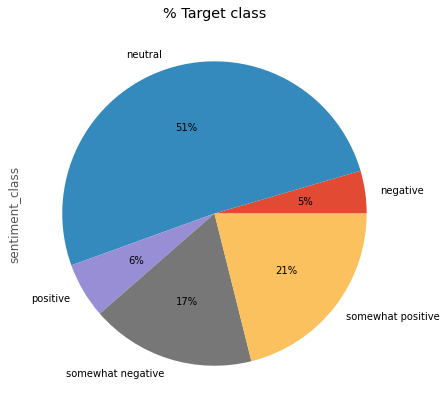

In [19]:
((train.groupby('sentiment_class')['sentiment_class'].count()/train.shape[0])*100).plot(kind='pie',figsize=(7,7),title='% Target class', autopct='%1.0f%%')

In [20]:
# Adding Phrase length 
train['PharaseLength'] = train['Pharase'].apply(lambda x : len(x))

In [21]:
print(train['PharaseLength'])

0         108
1          47
2           6
3           0
4           6
         ... 
156055      6
156056     25
156057     18
156058      9
156059      8
Name: PharaseLength, Length: 156060, dtype: int64


In [22]:
train.sort_values(by = 'PharaseLength',ascending=False).head()

PhraseId  SentenceId  \
54876     54877        2734   
62992     62993        3189   
26148     26149        1199   
62500     62501        3162   
72577     72578        3708   

                                                  Phrase  Sentiment  \
54876  Filmmakers Dana JanklowiczMann Amir Mann area ...          3   
62992  addition sporting worst titles recent cinemati...          0   
26148  movie biggest shocks come from seeing former n...          1   
62500  While transgressive trappings especially frank...          1   
72577  Stephen Earnhart documentary decomposition hea...          1   

         sentiment_class                                            Pharase  \
54876  somewhat positive  Filmmakers Dana JanklowiczMann Amir Mann area ...   
62992           negative  addition sporting worst titles recent cinemati...   
26148  somewhat negative  movie biggest shocks come seeing former nymphe...   
62500  somewhat negative  While transgressive trappings especially frank...   
72577  somewhat negative  Stephen Earnhart documentary decomposition hea...   

       PharaseLength  
54876            207  
62992            200  
26148            199  
62500            197  
72577            196

In [23]:
# Common words with word cloud
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [24]:
word_cloud_common_words = []
for index,row in train.iterrows():
    word_cloud_common_words.append((row['Phrase']))
word_cloud_common_words    

['series escapades demonstrating adage that what good goose also good gander some which occasionally amuses none which amounts much story',
 'series escapades demonstrating adage that what good goose',
 'series',
 '',
 'series',
 'escapades demonstrating adage that what good goose',
 '',
 'escapades demonstrating adage that what good goose',
 'escapades',
 'demonstrating adage that what good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'that what good goose',
 'that',
 'what good goose',
 'what',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander some which occasionally amuses none which amounts much story',
 'also good gander some which occasionally amuses none which amounts much story',
 'also',
 'also',
 'good gander some which occasionally amuses none which amounts much story',
 'gander some which occasionally amuses none which amounts much story',
 'gander some which occasionally amuses none which amount

In [25]:
wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(''.join(word_cloud_common_words)) 

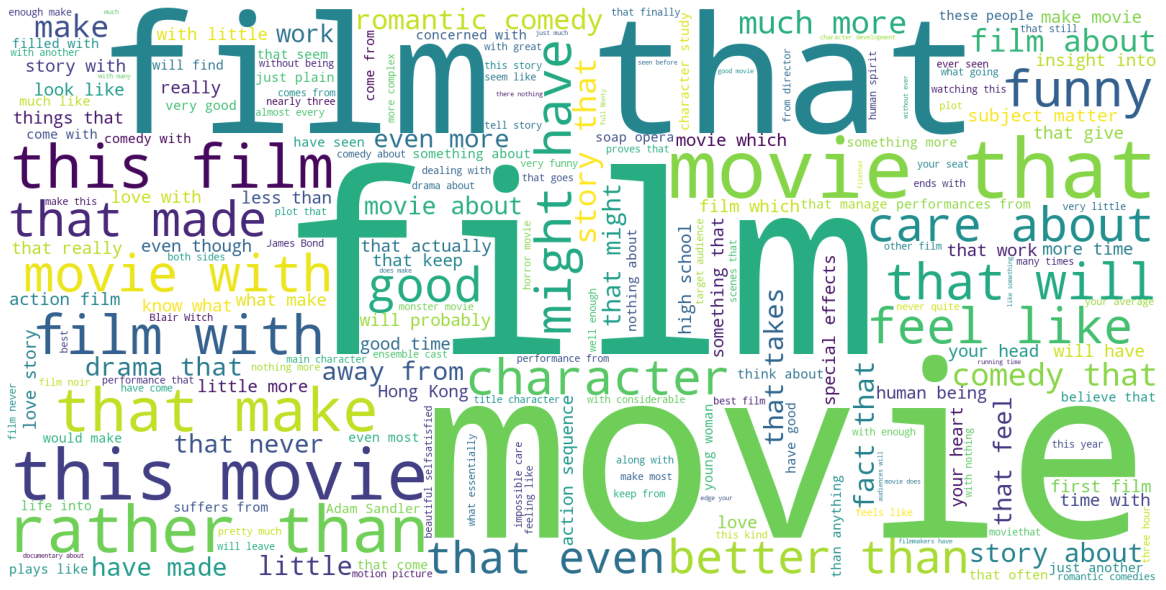

In [26]:
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [27]:
# word frequency
text_list = []
for index,row in train.iterrows():
    text_list.append((row["Phrase"]))
text_list

['series escapades demonstrating adage that what good goose also good gander some which occasionally amuses none which amounts much story',
 'series escapades demonstrating adage that what good goose',
 'series',
 '',
 'series',
 'escapades demonstrating adage that what good goose',
 '',
 'escapades demonstrating adage that what good goose',
 'escapades',
 'demonstrating adage that what good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'that what good goose',
 'that',
 'what good goose',
 'what',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander some which occasionally amuses none which amounts much story',
 'also good gander some which occasionally amuses none which amounts much story',
 'also',
 'also',
 'good gander some which occasionally amuses none which amounts much story',
 'gander some which occasionally amuses none which amounts much story',
 'gander some which occasionally amuses none which amount

In [28]:
total_words = ''.join(text_list)
total_words

'series escapades demonstrating adage that what good goose also good gander some which occasionally amuses none which amounts much storyseries escapades demonstrating adage that what good gooseseriesseriesescapades demonstrating adage that what good gooseescapades demonstrating adage that what good gooseescapadesdemonstrating adage that what good goosedemonstrating adagedemonstratingadageadagethat what good goosethatwhat good goosewhatgood goosegood goosegoodgoosegoosegoosealso good gander some which occasionally amuses none which amounts much storyalso good gander some which occasionally amuses none which amounts much storyalsoalsogood gander some which occasionally amuses none which amounts much storygander some which occasionally amuses none which amounts much storygander some which occasionally amuses none which amounts much storygandergandergandersome which occasionally amuses none which amounts much storysome whichsomewhichwhichoccasionally amuses none which amounts much storyocc

In [29]:
total_words = word_tokenize(total_words)

In [30]:
freq_words = FreqDist(total_words)
word_frequency = FreqDist(freq_words)

In [31]:
# 10 common words
print(word_frequency.most_common(20))

[('that', 9438), ('with', 6133), ('this', 3449), ('film', 3435), ('movie', 3077), ('than', 2919), ('from', 2803), ('more', 2644), ('about', 2616), ('have', 2261), ('like', 2090), ('into', 1758), ('their', 1445), ('your', 1364), ('most', 1274), ('story', 1250), ('much', 1237), ('good', 1208), ('what', 1191), ('some', 1151)]


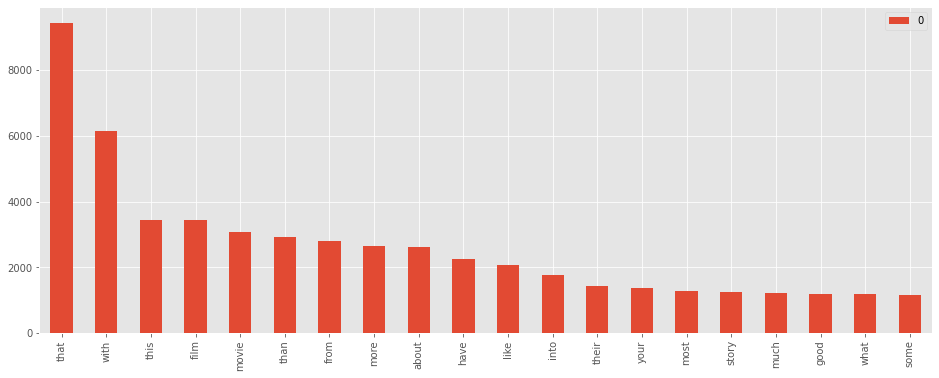

In [32]:
# visualize 
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

In [33]:
neg_text_list=[]  
for index, row in train[train['Sentiment']==0].iterrows(): 
    neg_text_list.append((row['Phrase'])) 
neg_text_list

neg_total_words=' '.join(neg_text_list)
neg_total_words=word_tokenize(neg_total_words)

neg_freq_words=FreqDist(neg_total_words)
neg_word_frequency=FreqDist(neg_freq_words)

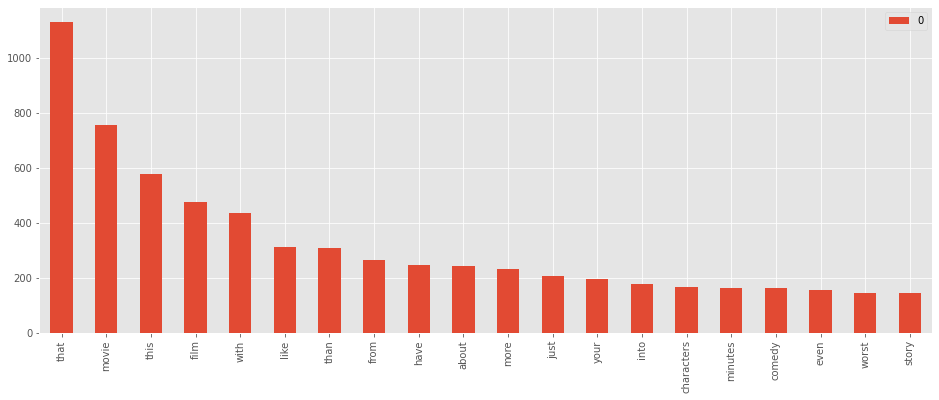

In [34]:
# visualize 
pd.DataFrame(neg_word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

In [35]:
pos_text_list=[]  
for index, row in train[train['Sentiment']==4].iterrows(): 
    pos_text_list.append((row['Phrase'])) 
pos_text_list

pos_total_words=' '.join(pos_text_list)
pos_total_words=word_tokenize(pos_total_words)

pos_freq_words=FreqDist(pos_total_words)
pos_word_frequency=FreqDist(pos_freq_words)


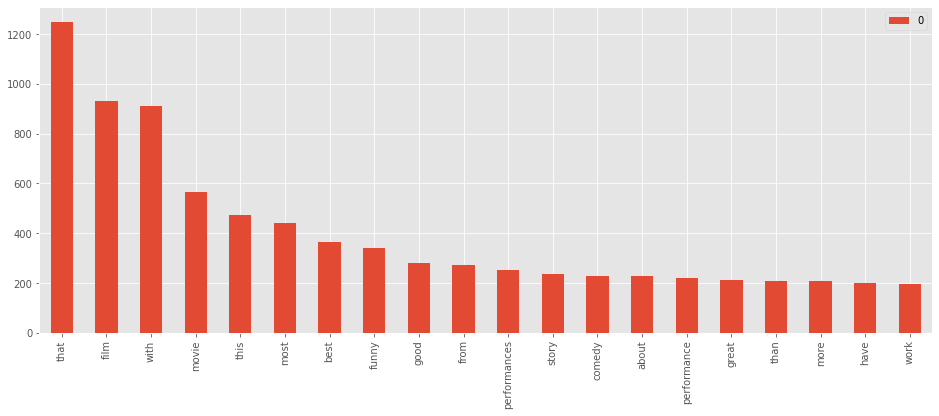

In [36]:
# visualize 
pd.DataFrame(pos_word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

In [37]:
text="Tom and Jerry love mickey. But mickey dont love Tom and Jerry. What a love mickey is getting from these two friends"
bigram_frequency = FreqDist(ngrams(word_tokenize(text),3))
bigram_frequency.most_common()[0:5]

[(('Tom', 'and', 'Jerry'), 2),
 (('and', 'Jerry', 'love'), 1),
 (('Jerry', 'love', 'mickey'), 1),
 (('love', 'mickey', '.'), 1),
 (('mickey', '.', 'But'), 1)]

In [38]:
text_list=[]  
for index, row in train.iterrows(): 
    text_list.append((row['Phrase'])) 
text_list

total_words=' '.join(text_list)
total_words=word_tokenize(total_words)

freq_words=FreqDist(total_words)
word_frequency=FreqDist(ngrams(freq_words,2))
word_frequency.most_common()[0:5]

[(('series', 'escapades'), 1),
 (('escapades', 'demonstrating'), 1),
 (('demonstrating', 'adage'), 1),
 (('adage', 'that'), 1),
 (('that', 'what'), 1)]

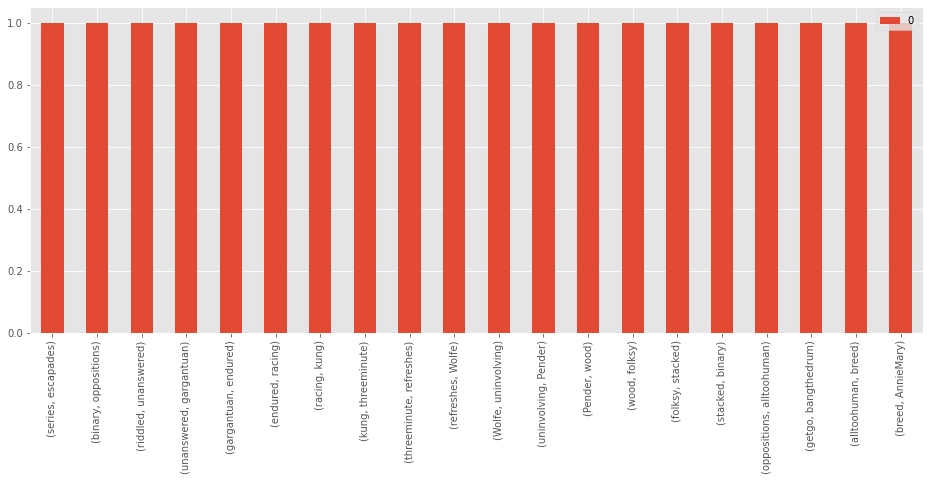

In [39]:
# visualize 
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

## Machine Learning

In [40]:
# prepare training data
# Create Bag of words with CountVectorizer
train['tokenized_words'] = train["Pharase"].apply(lambda x: word_tokenize(x))
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  series escapades demonstrating adage that what...   
1         2           1  series escapades demonstrating adage that what...   
2         3           1                                             series   
3         4           1                                                      
4         5           1                                             series   

   Sentiment    sentiment_class  \
0          1  somewhat negative   
1          2            neutral   
2          2            neutral   
3          2            neutral   
4          2            neutral   

                                             Pharase  PharaseLength  \
0  series escapades demonstrating adage good goos...            108   
1    series escapades demonstrating adage good goose             47   
2                                             series              6   
3                                                                 0   
4                                             series              6   

                                     tokenized_words  
0  [series, escapades, demonstrating, adage, good...  
1  [series, escapades, demonstrating, adage, good...  
2                                           [series]  
3                                                 []  
4                                           [series]

In [41]:
count_vectorizer = CountVectorizer()
phrase_dtm = count_vectorizer.fit_transform(train['Phrase'])

In [42]:
#print(count_vectorizer.get_feature_names())
print(phrase_dtm.shape)

(156060, 15763)


In [43]:
X_train,X_test,y_train,y_test = train_test_split(phrase_dtm,train['Sentiment'],test_size = 0.3,random_state = 38)

In [44]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((109242, 15763), (109242,), (46818, 15763), (46818,))

In [45]:
# train Logistic Regression model
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Measure model performance
accuracy_score(model.predict(X_test),y_test)*100

63.81733521295229

In [48]:
# Free up memory for tf-idf
del X_train
del X_test
del y_train
del y_test

In [50]:
# Preparing data with tf-idf
tfidf = TfidfVectorizer()
tfidf_dtm = tfidf.fit_transform(train['Phrase'])

In [51]:
X_train,X_test,y_train,y_test = train_test_split(tfidf_dtm,train['Sentiment'],test_size = 0.3,random_state =38)

In [52]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((109242, 15763), (109242,), (46818, 15763), (46818,))

In [53]:
tfidf_model = LogisticRegression()

In [54]:
tfidf_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
accuracy_score(tfidf_model.predict(X_test),y_test)*100

62.49092229484386

In [57]:
# Predict on test data
print(tfidf_model.predict(X_test)[0:10])

[3 2 2 2 2 2 2 3 2 3]


In [58]:
def predict_new_text(text):
    tfidf_text=tfidf.transform([text])
    return tfidf_model.predict(tfidf_text)

In [59]:
predict_new_text("The movie is bad and sucks!")

array([0], dtype=int64)

In [61]:
# prepare test data
test['Phrase']=test['Phrase'].apply(lambda x:remove_punctuation(x))
test['Phrase']=test['Phrase'].apply(lambda x:words_with_some_more_than_three_chars(x))
test['Phrase']=test['Phrase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
test_dtm=tfidf.transform(test['Phrase'])

In [62]:
# Predict with test data
test['Sentiment']=tfidf_model.predict(test_dtm)
test.set_index=test['PhraseId']
test.head()

PhraseId  SentenceId                                         Phrase  \
0    156061        8545  intermittently pleasing mostly routine effort   
1    156062        8545  intermittently pleasing mostly routine effort   
2    156063        8545                                                  
3    156064        8545  intermittently pleasing mostly routine effort   
4    156065        8545         intermittently pleasing mostly routine   

   Sentiment  
0          3  
1          3  
2          2  
3          3  
4          3